Nama : Mochamad Revan Haerudin <br>
NIM : 211351084 <br>
Kelas : Malam A

# import Dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mochammadrevanh","key":"9bc4ceaf0aa065d71b19a32411c382ec"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d unsdsn/world-happiness

  0% 0.00/36.8k [00:00<?, ?B/s]
100% 36.8k/36.8k [00:00<00:00, 39.2MB/s]


In [4]:
!mkdir world-happiness
!unzip world-happiness.zip -d world-happiness
!ls world-happiness

Archive:  world-happiness.zip
  inflating: world-happiness/2015.csv  
  inflating: world-happiness/2016.csv  
  inflating: world-happiness/2017.csv  
  inflating: world-happiness/2018.csv  
  inflating: world-happiness/2019.csv  
2015.csv  2016.csv  2017.csv  2018.csv	2019.csv


# import library yang digunakan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
import plotly.graph_objs as go
from plotly.offline import iplot

# Data Discovery

In [6]:
df = pd.read_csv('/content/world-happiness/2015.csv')

Lihat 5 data sampel data

In [7]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Informasi dataset setiap kolom, bisa kita lihat seperti tipe data tiap kolom, nama kolom dan lain-lain

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Describe dataframe

In [9]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Kita lihat apakah ada kolom yang memilki nilai null? ternyata tidak, semua data tidak ada yang null

In [10]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Melihat banyak kolom dan baris pada dataframe

In [11]:
df.shape

(158, 12)

Karena kita orang Indonesia mari kita lihat data Indonesia, ternyata Indonesia peringkat ke 74 dari total 158 negara

In [12]:
df.loc[df['Country']=='Indonesia']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
73,Indonesia,Southeastern Asia,74,5.399,0.02596,0.82827,1.08708,0.63793,0.46611,0.0,0.51535,1.86399


# EDA (minimal 5)

Mari kita lihat top 10 negara dengan kriteria yang berbeda beda

<Axes: xlabel='Freedom', ylabel='Country'>

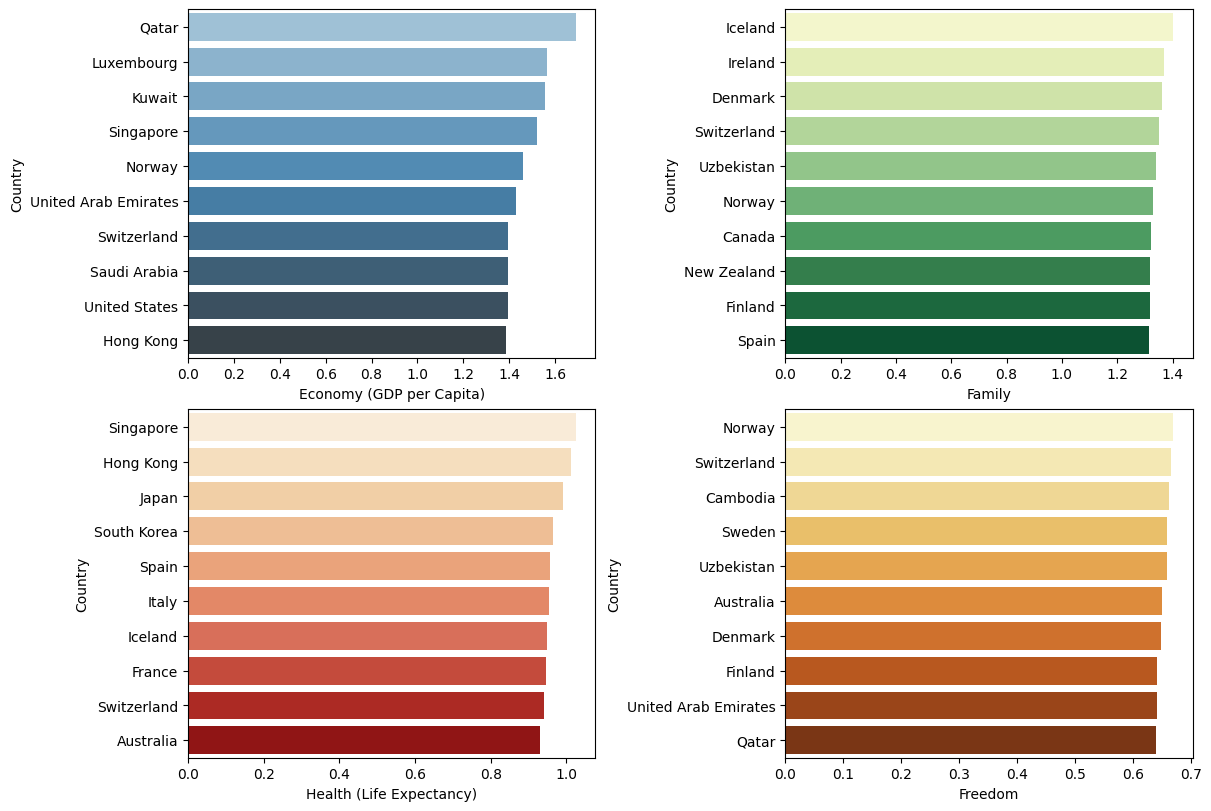

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='Economy (GDP per Capita)',y='Country',data=df.nlargest(10,'Economy (GDP per Capita)'),ax=axes[0,0],palette="Blues_d")
sns.barplot(x='Family' ,y='Country',data=df.nlargest(10,'Family'),ax=axes[0,1],palette="YlGn")
sns.barplot(x='Health (Life Expectancy)' ,y='Country',data=df.nlargest(10,'Health (Life Expectancy)'),ax=axes[1,0],palette='OrRd')
sns.barplot(x='Freedom' ,y='Country',data=df.nlargest(10,'Freedom'),ax=axes[1,1],palette='YlOrBr')

Dan kita lihat 10 top negara berdasarkan Happiness Score, Switzerland berada pada tingkat ke 1. Dapat kita lihat Switzerland selalu ada dalam top 10, ini artinya kriteria diatas memiliki korelasi pada Happiness Score

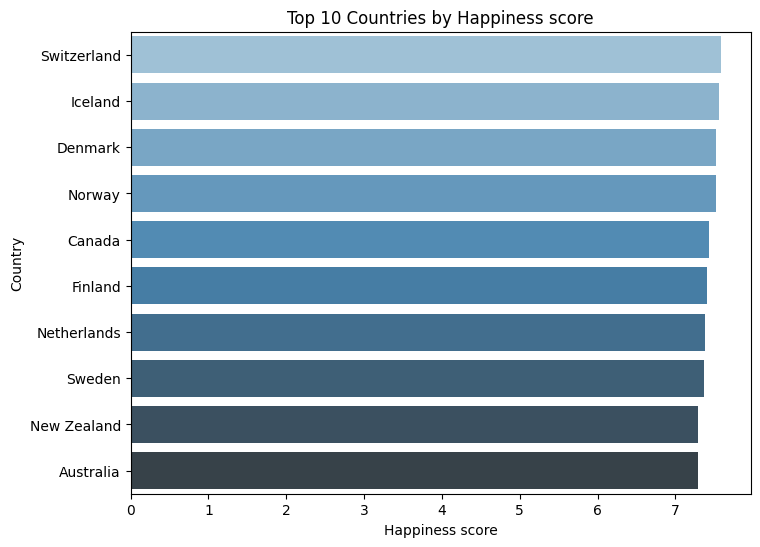

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Happiness Score', y='Country', data=df.nlargest(10, 'Happiness Score'), palette="Blues_d")
plt.title('Top 10 Countries by Happiness score')
plt.xlabel('Happiness score')
plt.ylabel('Country')

plt.show()

Sedangkan disini Myanmar dengan generosity dan Rwanda dengan Trust Goverment Corruption tertinggi, tidak pernah ada dalam top 10 kriteria diatas, dapat kita simpulkan generosity dan Trust Goverment Corruption memiliki korelasi yang tidak begitu kuat dengan kritia diatas. Dan Indonesia masuk ke top 5 informasi yang menarik

<Axes: xlabel='Trust (Government Corruption)', ylabel='Country'>

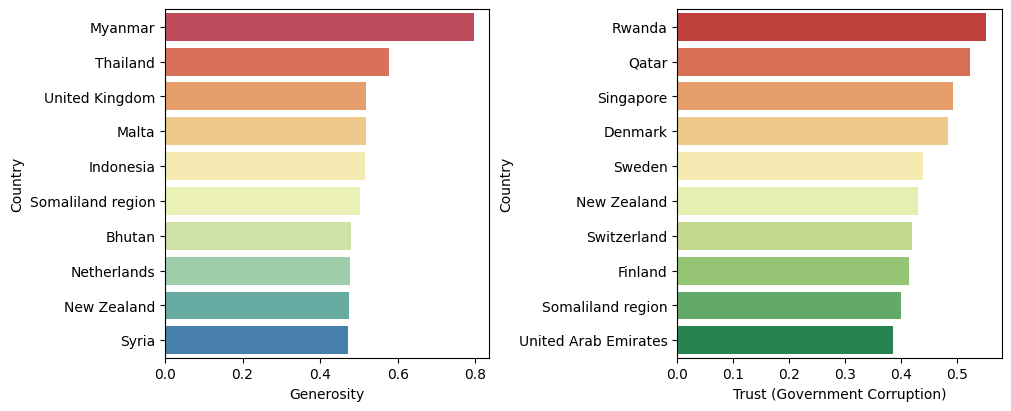

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(10,4))

sns.barplot(x='Generosity' ,y='Country',data=df.nlargest(10,'Generosity'),ax=axes[0],palette='Spectral')
sns.barplot(x='Trust (Government Corruption)' ,y='Country',data=df.nlargest(10,'Trust (Government Corruption)'),ax=axes[1],palette='RdYlGn')

Menampilkan Globe dengan happines score pada setiap negara

In [16]:
data = dict(type = 'choropleth',
           locations = df['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df['Happiness Score'],
           text = df['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score',
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

Kita lihat korelasi antar kolom

<ipython-input-17-8b1c55582bca>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

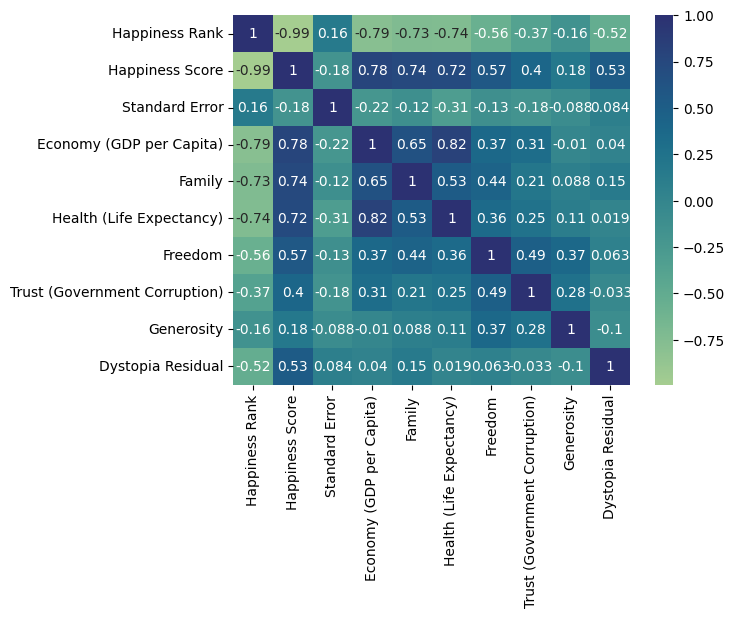

In [17]:
sns.heatmap(df.corr(), annot=True, cmap="crest")

# Preprocessing

Membuat dataframe baru dengan menghapus kolom-kolom yang tidak diperlukan

In [18]:
X = df.drop(["Region", "Happiness Rank", "Standard Error", "Dystopia Residual", "Generosity","Trust (Government Corruption)","Country"], axis=1)
X

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom
0,7.587,1.39651,1.34951,0.94143,0.66557
1,7.561,1.30232,1.40223,0.94784,0.62877
2,7.527,1.32548,1.36058,0.87464,0.64938
3,7.522,1.45900,1.33095,0.88521,0.66973
4,7.427,1.32629,1.32261,0.90563,0.63297
...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201
154,3.340,0.28665,0.35386,0.31910,0.48450
155,3.006,0.66320,0.47489,0.72193,0.15684
156,2.905,0.01530,0.41587,0.22396,0.11850


Ubah nama-nama kolom

In [19]:
X.rename(index=str, columns={
    "Happiness Score" : "Score",
    "Economy (GDP per Capita)" : "Economy",
    "Health (Life Expectancy)" : "Health",
}, inplace=True)

In [20]:
X

,Score,Economy,Family,Health,Freedom
0,7.587,1.39651,1.34951,0.94143,0.66557
1,7.561,1.30232,1.40223,0.94784,0.62877
2,7.527,1.32548,1.36058,0.87464,0.64938
3,7.522,1.45900,1.33095,0.88521,0.66973
4,7.427,1.32629,1.32261,0.90563,0.63297
...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201
154,3.340,0.28665,0.35386,0.31910,0.48450
155,3.006,0.66320,0.47489,0.72193,0.15684
156,2.905,0.01530,0.41587,0.22396,0.11850


# modeling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

Text(6, 100, 'Possible elbow point')

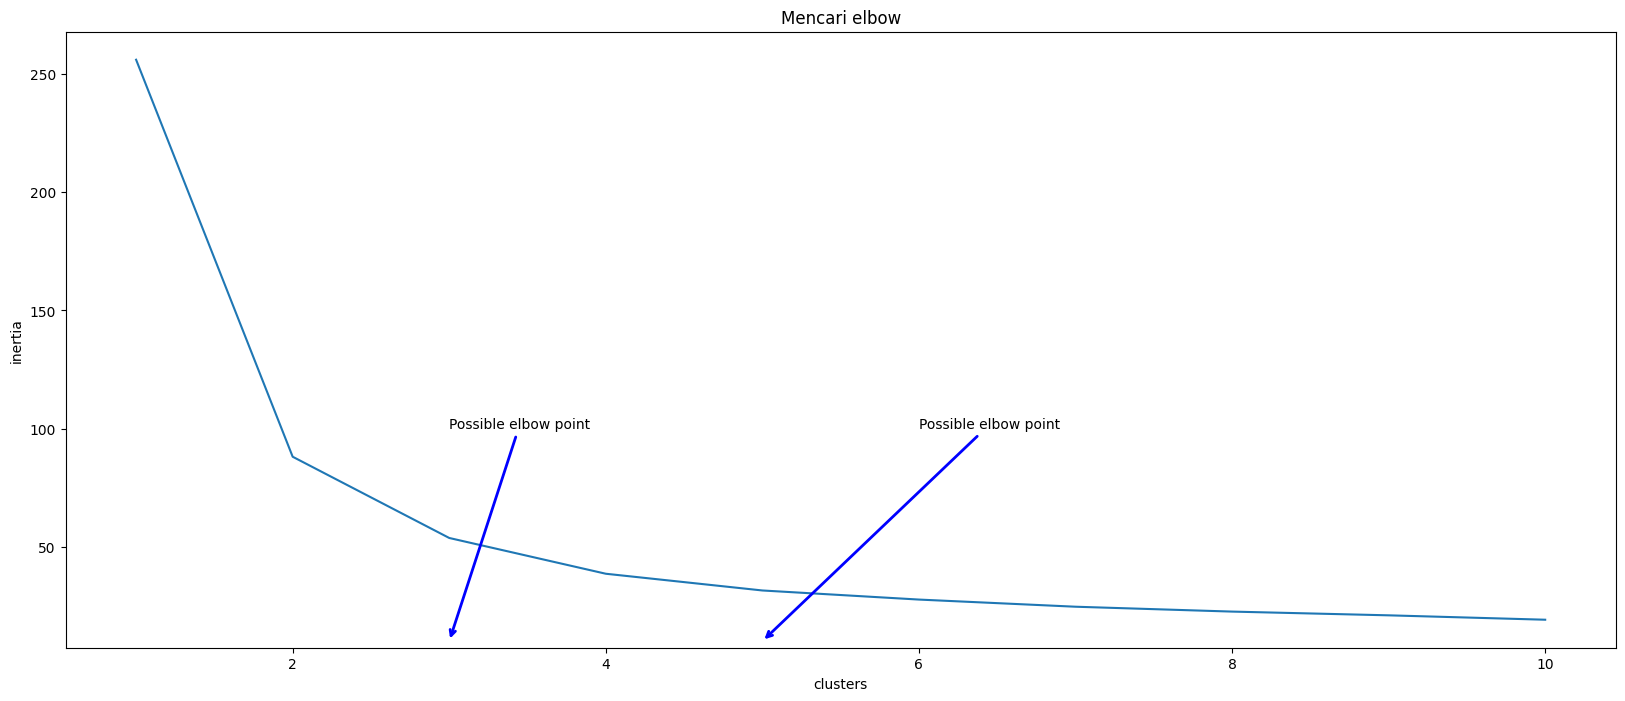

In [21]:
cluster = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    cluster.append(km.inertia_)

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x=list(range(1,11)), y=cluster, ax=ax)
ax.set_title("Mencari elbow")
ax.set_xlabel("clusters")
ax.set_ylabel("inertia")

ax.annotate("Possible elbow point", xy=(3,10), xytext=(3, 100), xycoords="data",
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color="blue", lw=2))

ax.annotate("Possible elbow point", xy=(5, 10), xytext=(6, 100), xycoords="data",
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color="blue", lw=2))

Disini 3,4,5 memungkinkan untuk dijadikan cluster, tetapi kita akan menggunakan 4 sebagai n_clust

In [22]:
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(X)
X["Labels"] = kmean.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



# Visualisasi hasil algoritma

Disini kita sudah membagi cluster menjadi 4 dan dapat kita lihat semakin tinggi nilai X semakin tinggi nilai y (Happines Score)

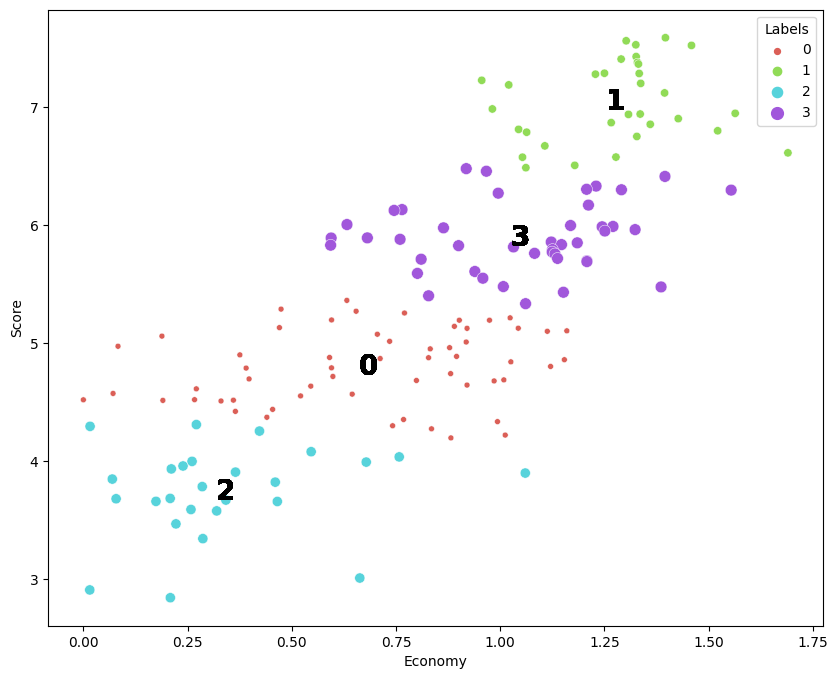

In [23]:
plt.figure (figsize=(10,8))
sns.scatterplot(x='Economy', y='Score', hue='Labels', size='Labels', palette=sns.color_palette('hls', n_clust), data=X, markers=True)

for label in X['Labels']:
  plt.annotate (label,
  (X[X['Labels']==label]['Economy'].mean(),
   X[X['Labels'] ==label]['Score'].mean()),
   horizontalalignment = 'center',
   verticalalignment = 'center',
   size = 20, weight='bold',
   color = 'black')

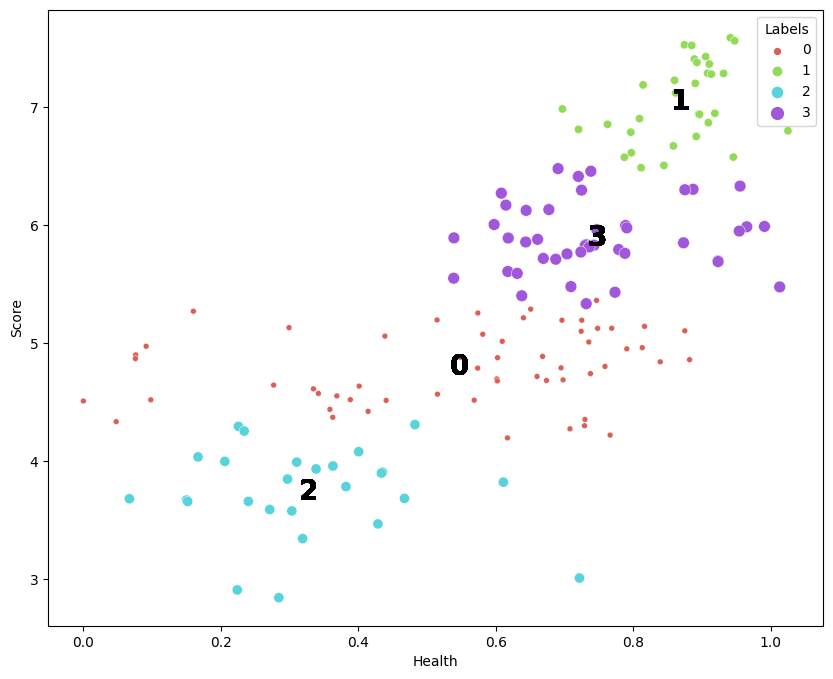

In [24]:
plt.figure (figsize=(10,8))
sns.scatterplot(x='Health', y='Score', hue='Labels', size='Labels', palette=sns.color_palette('hls', n_clust), data=X, markers=True)

for label in X['Labels']:
  plt.annotate (label,
  (X[X['Labels']==label]['Health'].mean(),
   X[X['Labels'] ==label]['Score'].mean()),
   horizontalalignment = 'center',
   verticalalignment = 'center',
   size = 20, weight='bold',
   color = 'black')

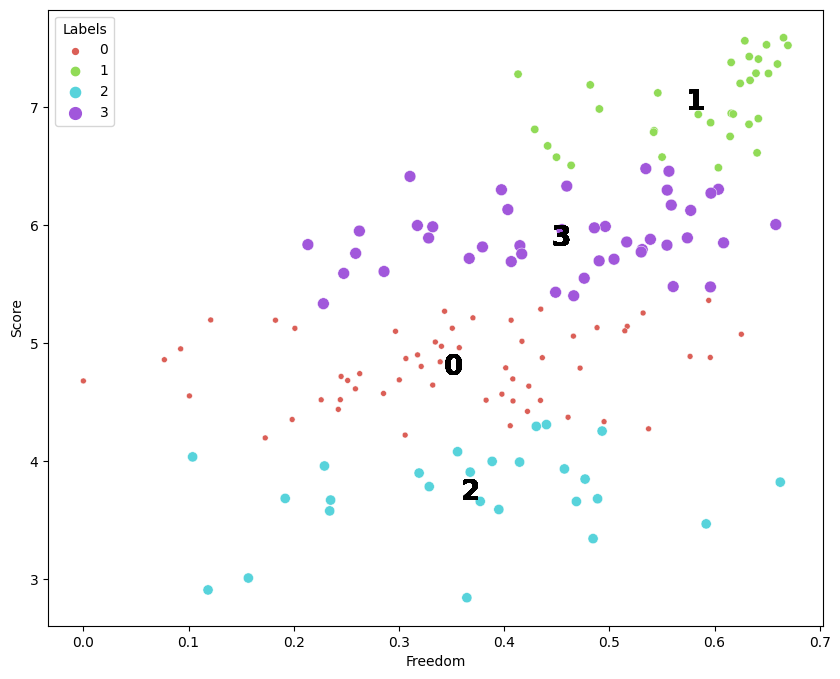

In [25]:
plt.figure (figsize=(10,8))
sns.scatterplot(x='Freedom', y='Score', hue='Labels', size='Labels', palette=sns.color_palette('hls', n_clust), data=X, markers=True)

for label in X['Labels']:
  plt.annotate (label,
  (X[X['Labels']==label]['Freedom'].mean(),
   X[X['Labels'] ==label]['Score'].mean()),
   horizontalalignment = 'center',
   verticalalignment = 'center',
   size = 20, weight='bold',
   color = 'black')

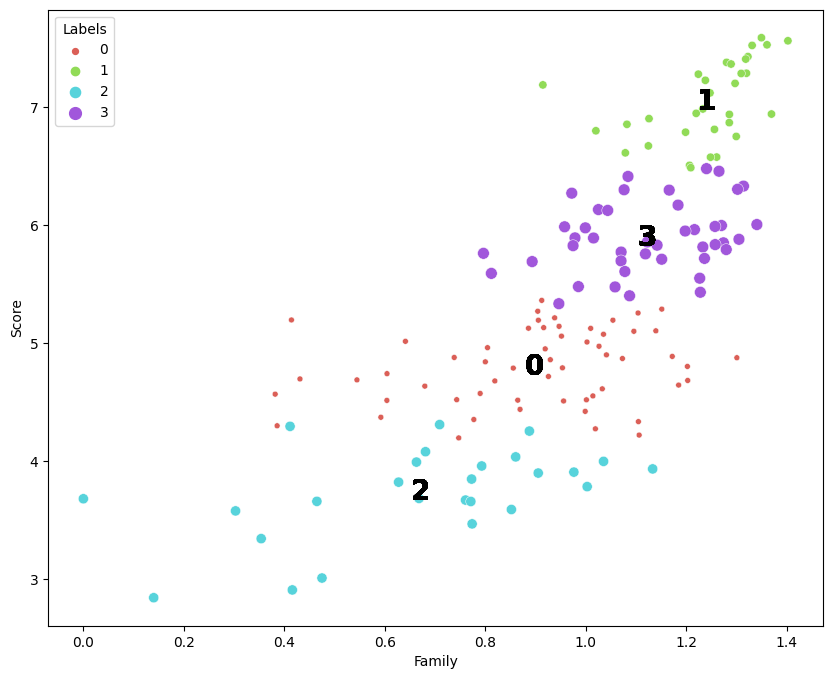

In [26]:
plt.figure (figsize=(10,8))
sns.scatterplot(x='Family', y='Score', hue='Labels', size='Labels', palette=sns.color_palette('hls', n_clust), data=X, markers=True)

for label in X['Labels']:
  plt.annotate (label,
  (X[X['Labels']==label]['Family'].mean(),
   X[X['Labels'] ==label]['Score'].mean()),
   horizontalalignment = 'center',
   verticalalignment = 'center',
   size = 20, weight='bold',
   color = 'black')

# save hasil cluster kedalam xlsx

In [27]:
X.to_excel("output_cluster.xlsx")